In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vinayak96","key":"c2a7f152d18e0cca427f954d326edb00"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c iiitb2020-home-credit-default-risk -p /content

 94% 100M/106M [00:01<00:00, 71.2MB/s] 
100% 106M/106M [00:01<00:00, 95.2MB/s]
 39% 5.00M/12.9M [00:00<00:00, 38.5MB/s]
100% 12.9M/12.9M [00:00<00:00, 63.1MB/s]
 50% 12.0M/24.0M [00:00<00:00, 46.8MB/s]
100% 24.0M/24.0M [00:00<00:00, 75.7MB/s]
 93% 73.0M/78.9M [00:00<00:00, 69.6MB/s]
100% 78.9M/78.9M [00:00<00:00, 95.5MB/s]
 88% 41.0M/46.4M [00:00<00:00, 66.7MB/s]
100% 46.4M/46.4M [00:00<00:00, 117MB/s] 
 94% 138M/147M [00:01<00:00, 61.7MB/s]
100% 147M/147M [00:01<00:00, 89.3MB/s]
  0% 0.00/380k [00:00<?, ?B/s]
100% 380k/380k [00:00<00:00, 123MB/s]
 95% 268M/283M [00:02<00:00, 135MB/s]
100% 283M/283M [00:02<00:00, 112MB/s]
100% 117M/117M [00:01<00:00, 81.0MB/s]
100% 117M/117M [00:01<00:00, 105MB/s] 


In [ ]:
!unzip \*.zip

Archive:  bureau_balance.csv.zip
  inflating: bureau_balance.csv      

Archive:  previous_application.csv.zip
  inflating: previous_application.csv  

Archive:  POS_CASH_balance.csv.zip
  inflating: POS_CASH_balance.csv    

Archive:  credit_card_balance.csv.zip
  inflating: credit_card_balance.csv  

Archive:  application_test.csv.zip
  inflating: application_test.csv    

Archive:  installments_payments.csv.zip
  inflating: installments_payments.csv  

Archive:  bureau.csv.zip
  inflating: bureau.csv              

Archive:  application_train.csv.zip
  inflating: application_train.csv   

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

9 archives were successfully processed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
application_train = pd.read_csv("/content/application_train.csv")
credit_card_balance = pd.read_csv("/content/credit_card_balance.csv")
installments_payments = pd.read_csv("/content/installments_payments.csv")
previous_application = pd.read_csv("/content/previous_application.csv")

In [ ]:
print("Application Shape: ", application_train.shape)
print("Credit_card_balance Shape: ", credit_card_balance.shape)
print("Installments_payments Shape: ", installments_payments.shape)
print("Previous_application Shape: ", previous_application.shape)

Application Shape:  (199882, 122)
Credit_card_balance Shape:  (3840312, 23)
Installments_payments Shape:  (13605401, 8)
Previous_application Shape:  (1670214, 37)


In [ ]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  object 
 1   SK_ID_CURR                   1670214 non-null  object 
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              object 
 1   SK_ID_CURR              object 
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(1), object(2)
memory usage: 830.4+ MB


In [ ]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  object 
 1   SK_ID_CURR                  object 
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [ ]:
previous_application.describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
installments_payments.describe()

,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [ ]:
credit_card_balance.describe()

,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,1.028054e+04,7.588857e+03,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,3.607808e+04,3.200599e+04,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,4.289207e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [ ]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,ooubarx,b7eodr,Consumer loans,5420.340,84825.0,76342.5,8482.5,84825.0,FRIDAY,12,Y,1,0.108909,NaN,NaN,XAP,Approved,-1886,Cash through the bank,XAP,Unaccompanied,New,Consumer Electronics,POS,XNA,Stone,203,Consumer electronics,24.0,high,POS household with interest,365243.0,-1852.0,-1162.0,-1282.0,-1275.0,0.0
1,oobra6x,e6ooux,Consumer loans,8094.735,66060.0,72598.5,0.0,66060.0,SATURDAY,13,Y,1,0.000000,NaN,NaN,XAP,Approved,-1568,Cash through the bank,XAP,Family,Repeater,Audio/Video,POS,XNA,Regional / Local,1031,Consumer electronics,12.0,high,POS household with interest,365243.0,-1537.0,-1207.0,-1417.0,-1413.0,0.0
2,6ruuaex,u7dard,Cash loans,NaN,0.0,0.0,NaN,NaN,SUNDAY,13,Y,1,NaN,NaN,NaN,XNA,Refused,-317,XNA,HC,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
3,x7bobbd,e7babr,Cash loans,18692.955,180000.0,191880.0,NaN,180000.0,TUESDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-297,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Regional / Local,400,Consumer electronics,12.0,low_normal,Cash X-Sell: low,365243.0,-267.0,63.0,-177.0,-173.0,1.0
4,oau7eex,udaxbx,Cash loans,22119.705,202500.0,215865.0,NaN,202500.0,FRIDAY,5,Y,1,NaN,NaN,NaN,XNA,Approved,-1239,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-1209.0,-879.0,-879.0,-873.0,1.0


In [ ]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,xaruuad,bru6rr,3.0,13,-132.0,-133.0,17361.360,17361.360
1,ea77d7d,e6ed67,0.0,110,-448.0,-448.0,110.655,110.655
2,o7eaxex,b7e6er,1.0,4,-1001.0,-1003.0,8944.155,8944.155
3,xud6eed,b7ar6d,0.0,28,-98.0,-103.0,15909.120,15909.120
4,oubddbx,7aubrx,1.0,2,-278.0,-300.0,6372.090,6372.090


In [ ]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,7oo7bed,aed6ex,-13,4118.715,720000,0.0,78471.135,0.0,78471.135,0.000,82820.925,82820.925,4118.715,4118.715,4118.715,0.0,8,0.0,8.0,0.0,Active,0,0
1,u7drxud,bddbud,-77,69769.575,90000,0.0,0.000,0.0,0.000,4500.000,9000.000,9000.000,66757.905,69318.405,69318.405,0.0,0,0.0,0.0,13.0,Active,0,0
2,derexud,ueodax,-92,61957.035,112500,0.0,0.000,0.0,0.000,3375.000,3375.000,3375.000,59962.635,61957.035,61957.035,0.0,0,0.0,0.0,4.0,Active,0,0
3,u66bubx,odoubr,-40,0.000,0,0.0,0.000,0.0,0.000,0.000,720.945,0.000,0.000,-720.945,-720.945,0.0,0,0.0,0.0,12.0,Active,0,0
4,deubd7d,rbrd6d,-26,156958.425,225000,76500.0,107332.875,0.0,30832.875,3448.305,28800.000,28800.000,150199.380,154898.415,154898.415,2.0,19,0.0,17.0,4.0,Active,0,0



################################## User defined Functions ##########################################

In [ ]:
def getCnamesNumeric(df):
    return list(df.select_dtypes(exclude='object').columns)

def getCnamesObject(df):
    return list(df.select_dtypes(include='object').columns)

def getDetailsAboutMissingValuesAllColumns(df):
  return df.isna().sum()

def getDetailsAboutOnlyMissingValuesColumns(df):
  print("Shape: ", df.shape)
  return df[list(df.columns[df.isna().any()])].isna().sum()

def dropColumns(df, columnNames):
  for column in columnNames:
    df = df.drop(column, axis = 1)
  return df

def imputeCategoricalMissingValuesUsingMode(df):
  columnName = getCnamesObject(df)
  for col in columnName: df[col].fillna(df[col].mode().values[0], inplace = True)

def imputeNumericMissingValuesUsingMean(df):
  columnName = getCnamesNumeric(df)
  for col in columnName: df[col].fillna(df[col].mean(), inplace = True)

def plotCountPlotForCategoricalFeatures(df, cnamesObject):
  number_of_rows = (len(cnamesObject) + 1)/2
  plt.figure(figsize=(20, 6*number_of_rows))

  for i in range(0,len(cnamesObject)):
    plt.subplot(number_of_rows,2,i+1)
    sns.countplot(y=cnamesObject[i], data = df)
    plt.title(cnamesObject[i])
    plt.tight_layout()

def distributionOfCategoricalFeaturesWRTTarget(df, cnamesObject):
  number_of_rows = (len(cnamesObject) + 1)/2
  plt.figure(figsize=(20, 6*number_of_rows))

  for i in range(0,len(cnamesObject)):
    plt.subplot(number_of_rows,2,i+1)
    sns.countplot(y=cnamesObject[i], hue="TARGET", data=df)
    plt.title(cnamesObject[i])
    plt.tight_layout()
  

def drawCorrelationMatrix(df) :
  length = len(getCnamesNumeric(df))
  correlaionMatrix = df.corr()
  plt.figure(figsize=(length,length*0.8))
  sns.heatmap(correlaionMatrix, annot=True, cmap = 'viridis')

def drawDistributionPlot(df, cnamesNumeric):
  number_of_rows = (len(cnamesNumeric) + 1)/2
  plt.figure(figsize=(20, 4*number_of_rows))

  for i in range(0, len(cnamesNumeric)):
    plt.subplot(number_of_rows,3,i+1)
    sns.kdeplot(df[cnamesNumeric[i]])
    plt.title(cnamesNumeric[i])
    plt.tight_layout()

def drawPieChartForCategoricalFeatures(df, columnNames):
  number_of_rows = int((len(columnNames) + 1)/2)
  plt.figure(figsize=(20, 6*number_of_rows))

  for i in range(0,len(columnNames)):
    col = columnNames[i]
    percentage = (df[col].value_counts(dropna=True, normalize=True)*100).to_list()
    labels = list(df[col].unique())
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percentage)]
    sizes = list(df[col].value_counts(dropna=True))
    ax1 = plt.subplot(number_of_rows,2,i + 1)
    wedges, autotexts = ax1.pie(sizes, startangle=90)
    #ax1.axis('equal')

    ax1.legend(wedges, labels,
              title=col,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(col)
  plt.show()
    

In [ ]:
aTrainCC = getCnamesObject(application_train)
print("Number of categorical columns in previous_application: ", len(aTrainCC), "\n", aTrainCC)
aTrainCC.remove('SK_ID_CURR')

paCC = getCnamesObject(previous_application)
print("Number of categorical columns in previous_application: ", len(paCC), "\n", paCC)
paCC.remove('SK_ID_PREV')
paCC.remove('SK_ID_CURR')

ipCC = getCnamesObject(installments_payments)
print("Number of categorical columns in installments_payments: ", len(ipCC), "\n", ipCC)

ccbCC = getCnamesObject(credit_card_balance)
print("Number of categorical columns in credit_card_balance: ", len(ccbCC), "\n", ccbCC)
ccbCC.remove('SK_ID_PREV')
ccbCC.remove('SK_ID_CURR')

paNC = getCnamesNumeric(previous_application)
print("Number of numerical columns in previous_application: ", len(paNC), "\n", paNC)
ipNC = getCnamesNumeric(installments_payments)
print("Number of numerical columns in installments_payments: ", len(ipNC), "\n", ipNC)
ccbNC = getCnamesNumeric(credit_card_balance)
print("Number of numerical columns in credit_card_balance: ", len(ccbNC), "\n", ccbNC)

Number of categorical columns in previous_application:  17 
 ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
Number of categorical columns in previous_application:  18 
 ['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']
Number of categorical columns in installments_payments:  2 
 ['SK_ID_PREV', 'SK_ID_CURR']
Number of categorical columns in credit_card_balance

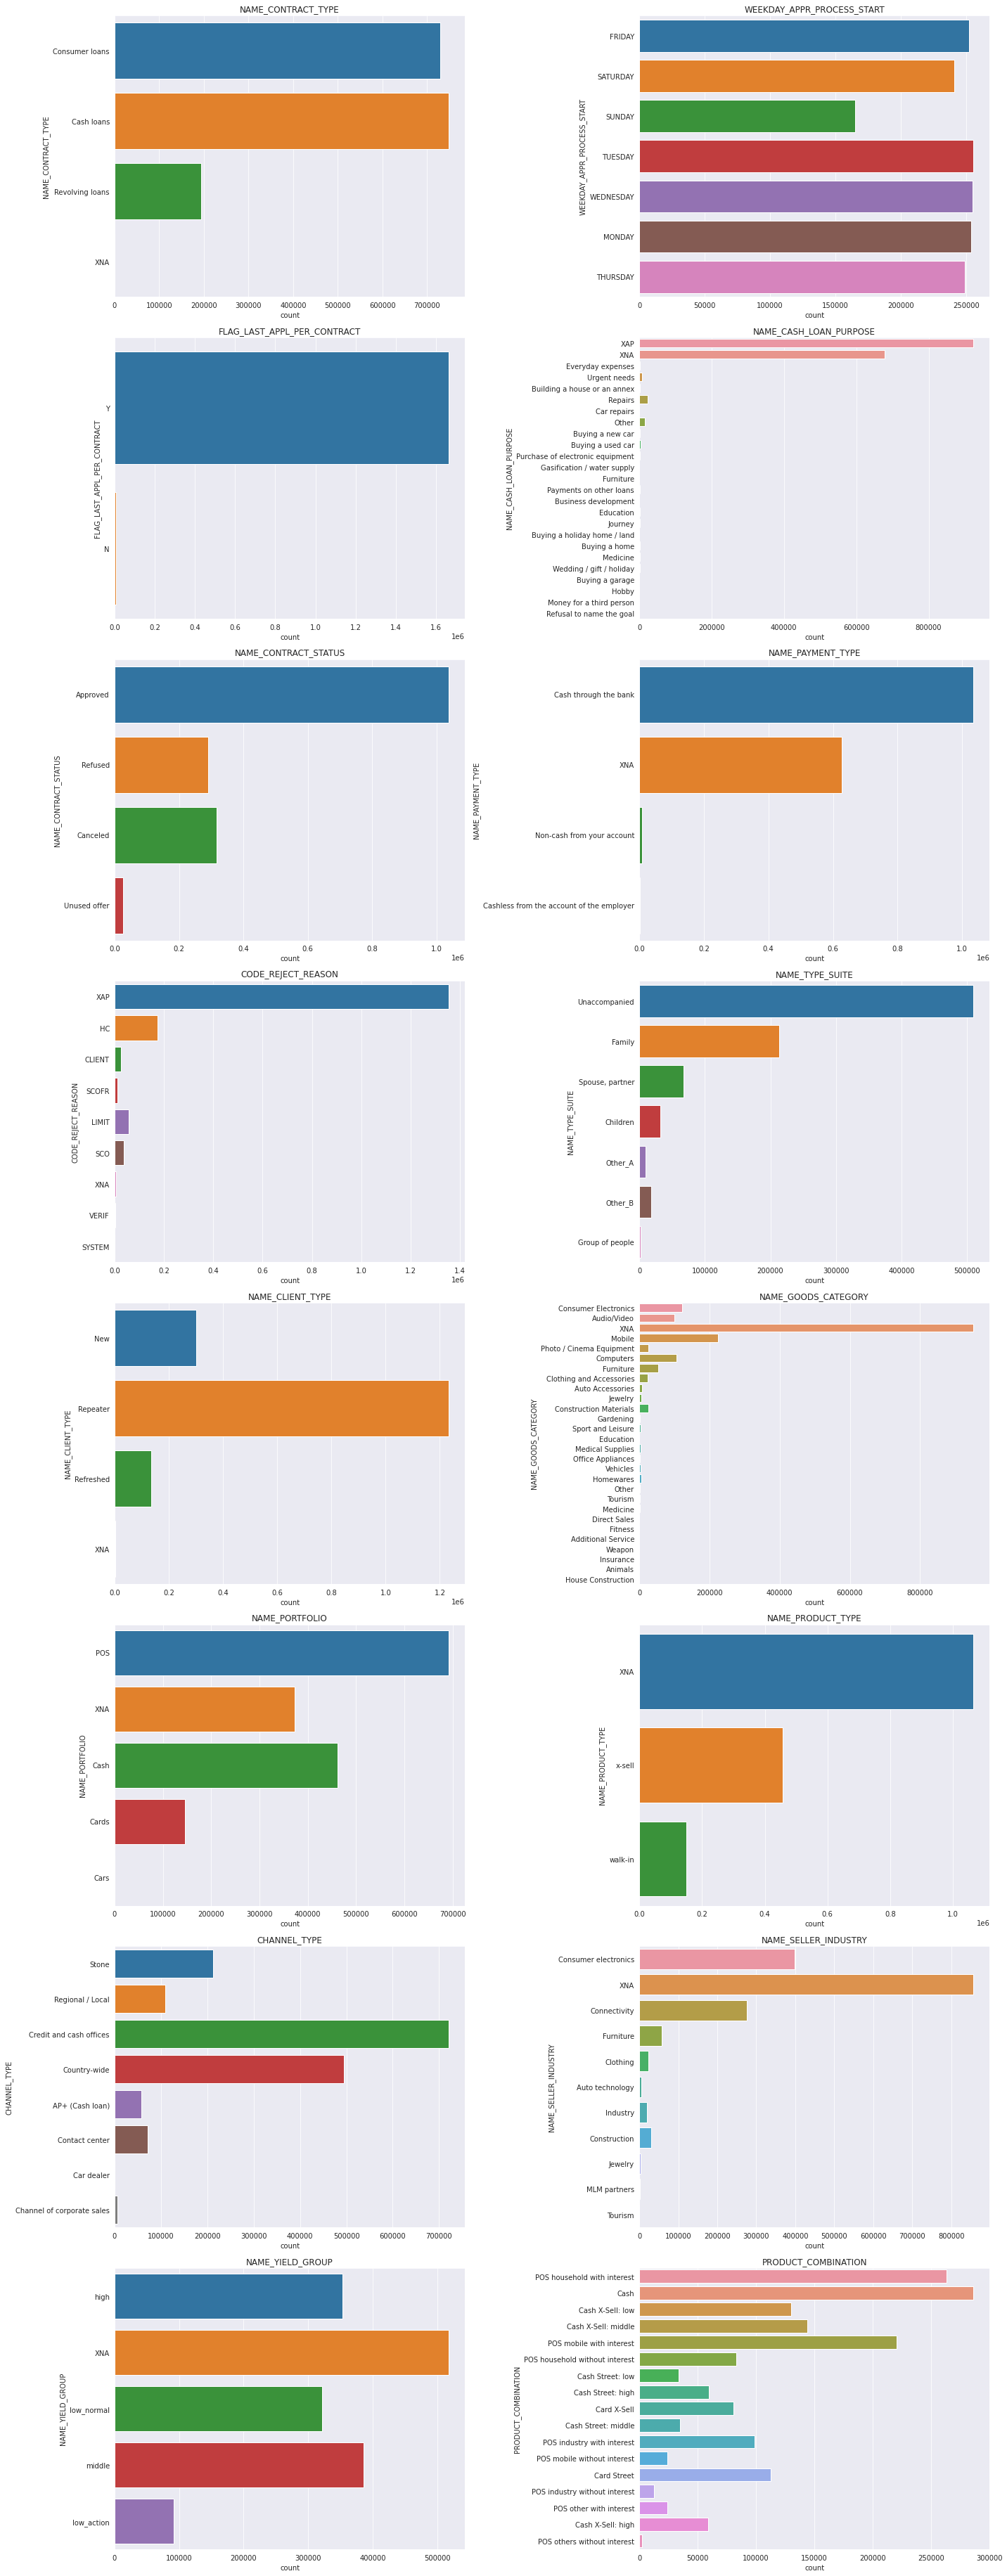

In [ ]:
plotCountPlotForCategoricalFeatures(previous_application, paCC)

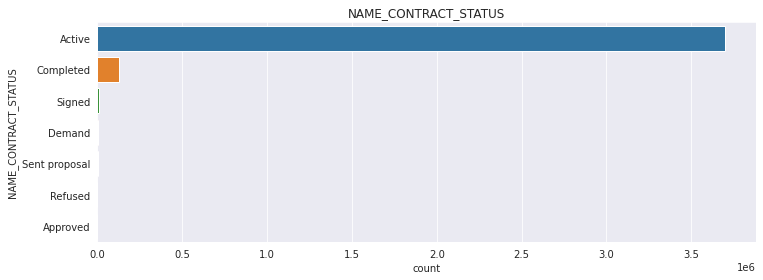

In [ ]:
plotCountPlotForCategoricalFeatures(credit_card_balance, ccbCC)

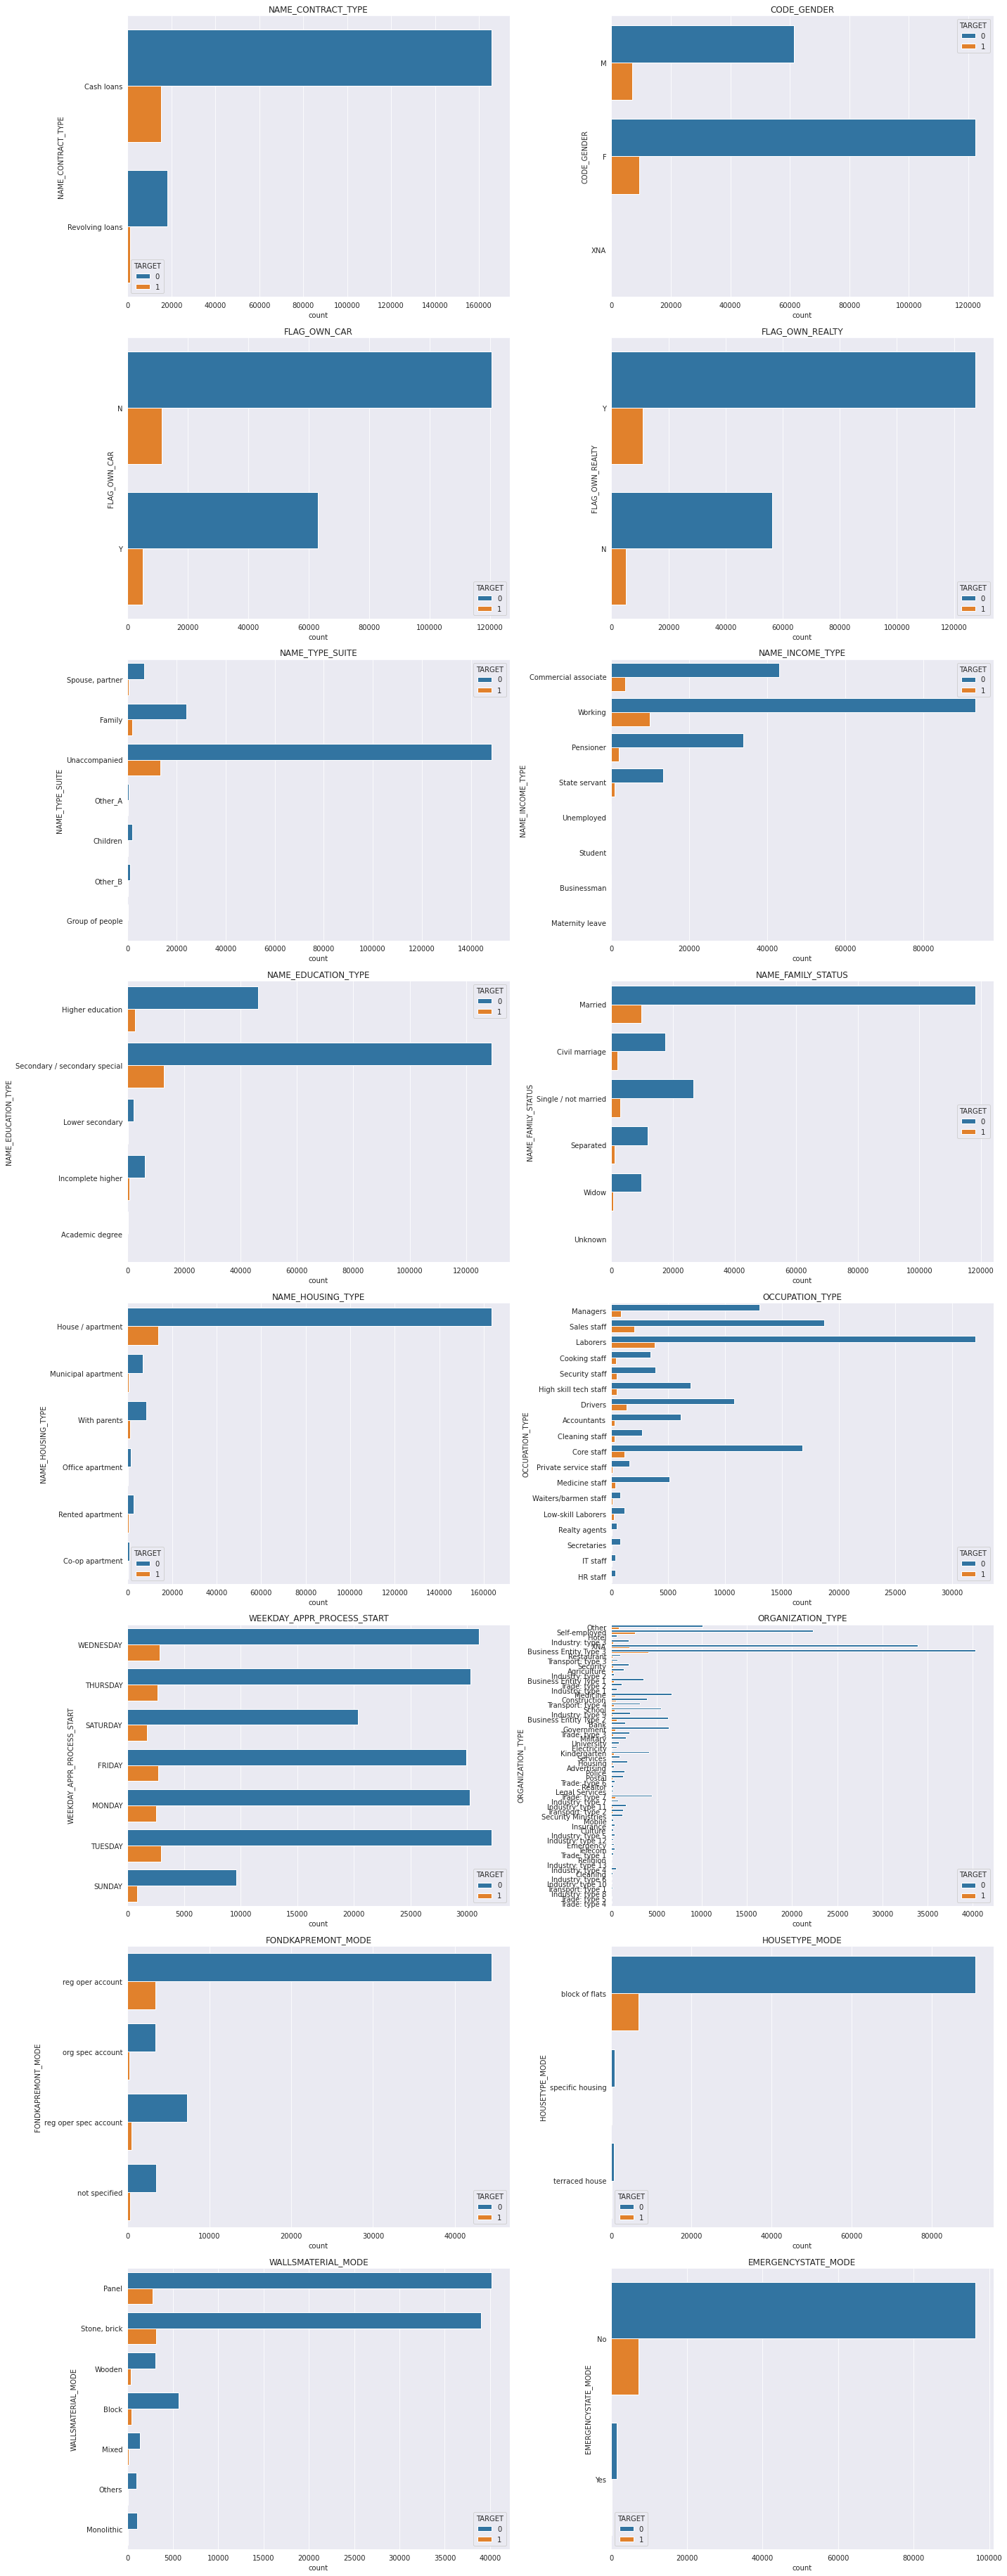

In [ ]:
distributionOfCategoricalFeaturesWRTTarget(application_train, aTrainCC)

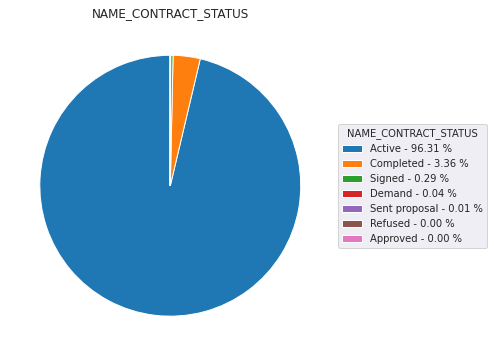

In [ ]:
drawPieChartForCategoricalFeatures(credit_card_balance, ccbCC)

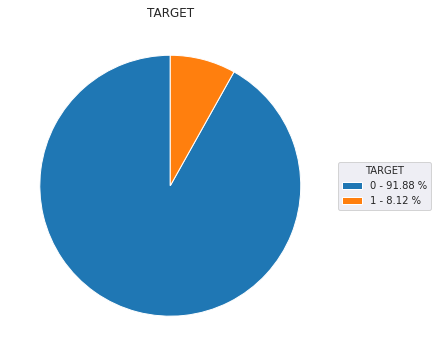

In [ ]:
targetTemp = ['TARGET']
drawPieChartForCategoricalFeatures(application_train, targetTemp)

In [ ]:
drawPieChartForCategoricalFeatures(installments_payments, ipCC)

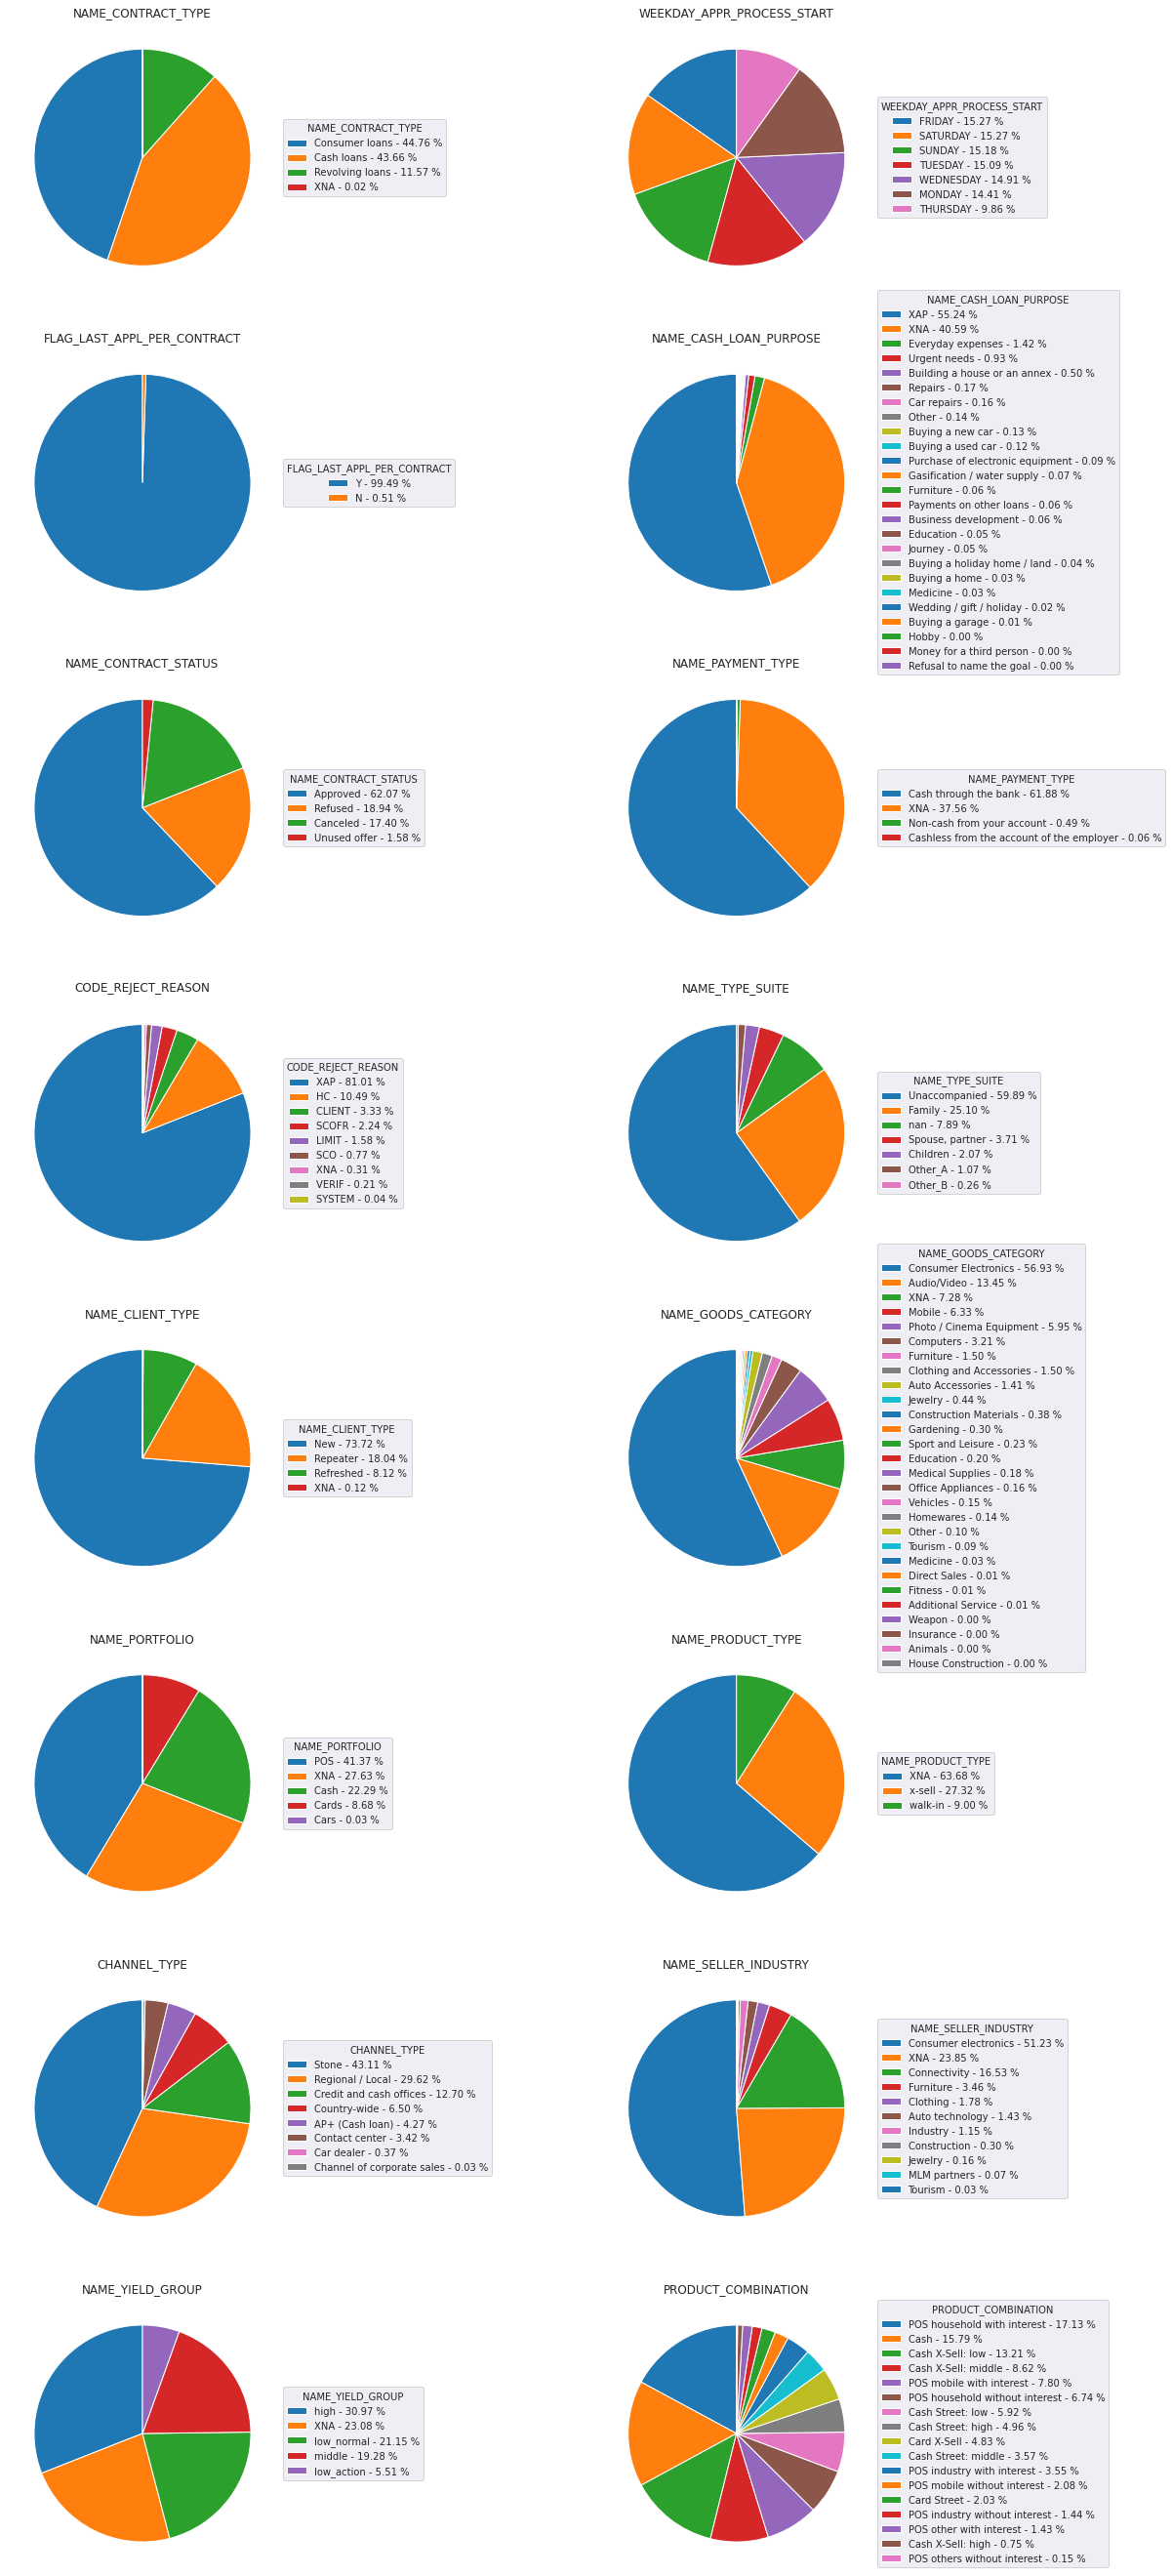

In [ ]:
drawPieChartForCategoricalFeatures(previous_application, paCC)

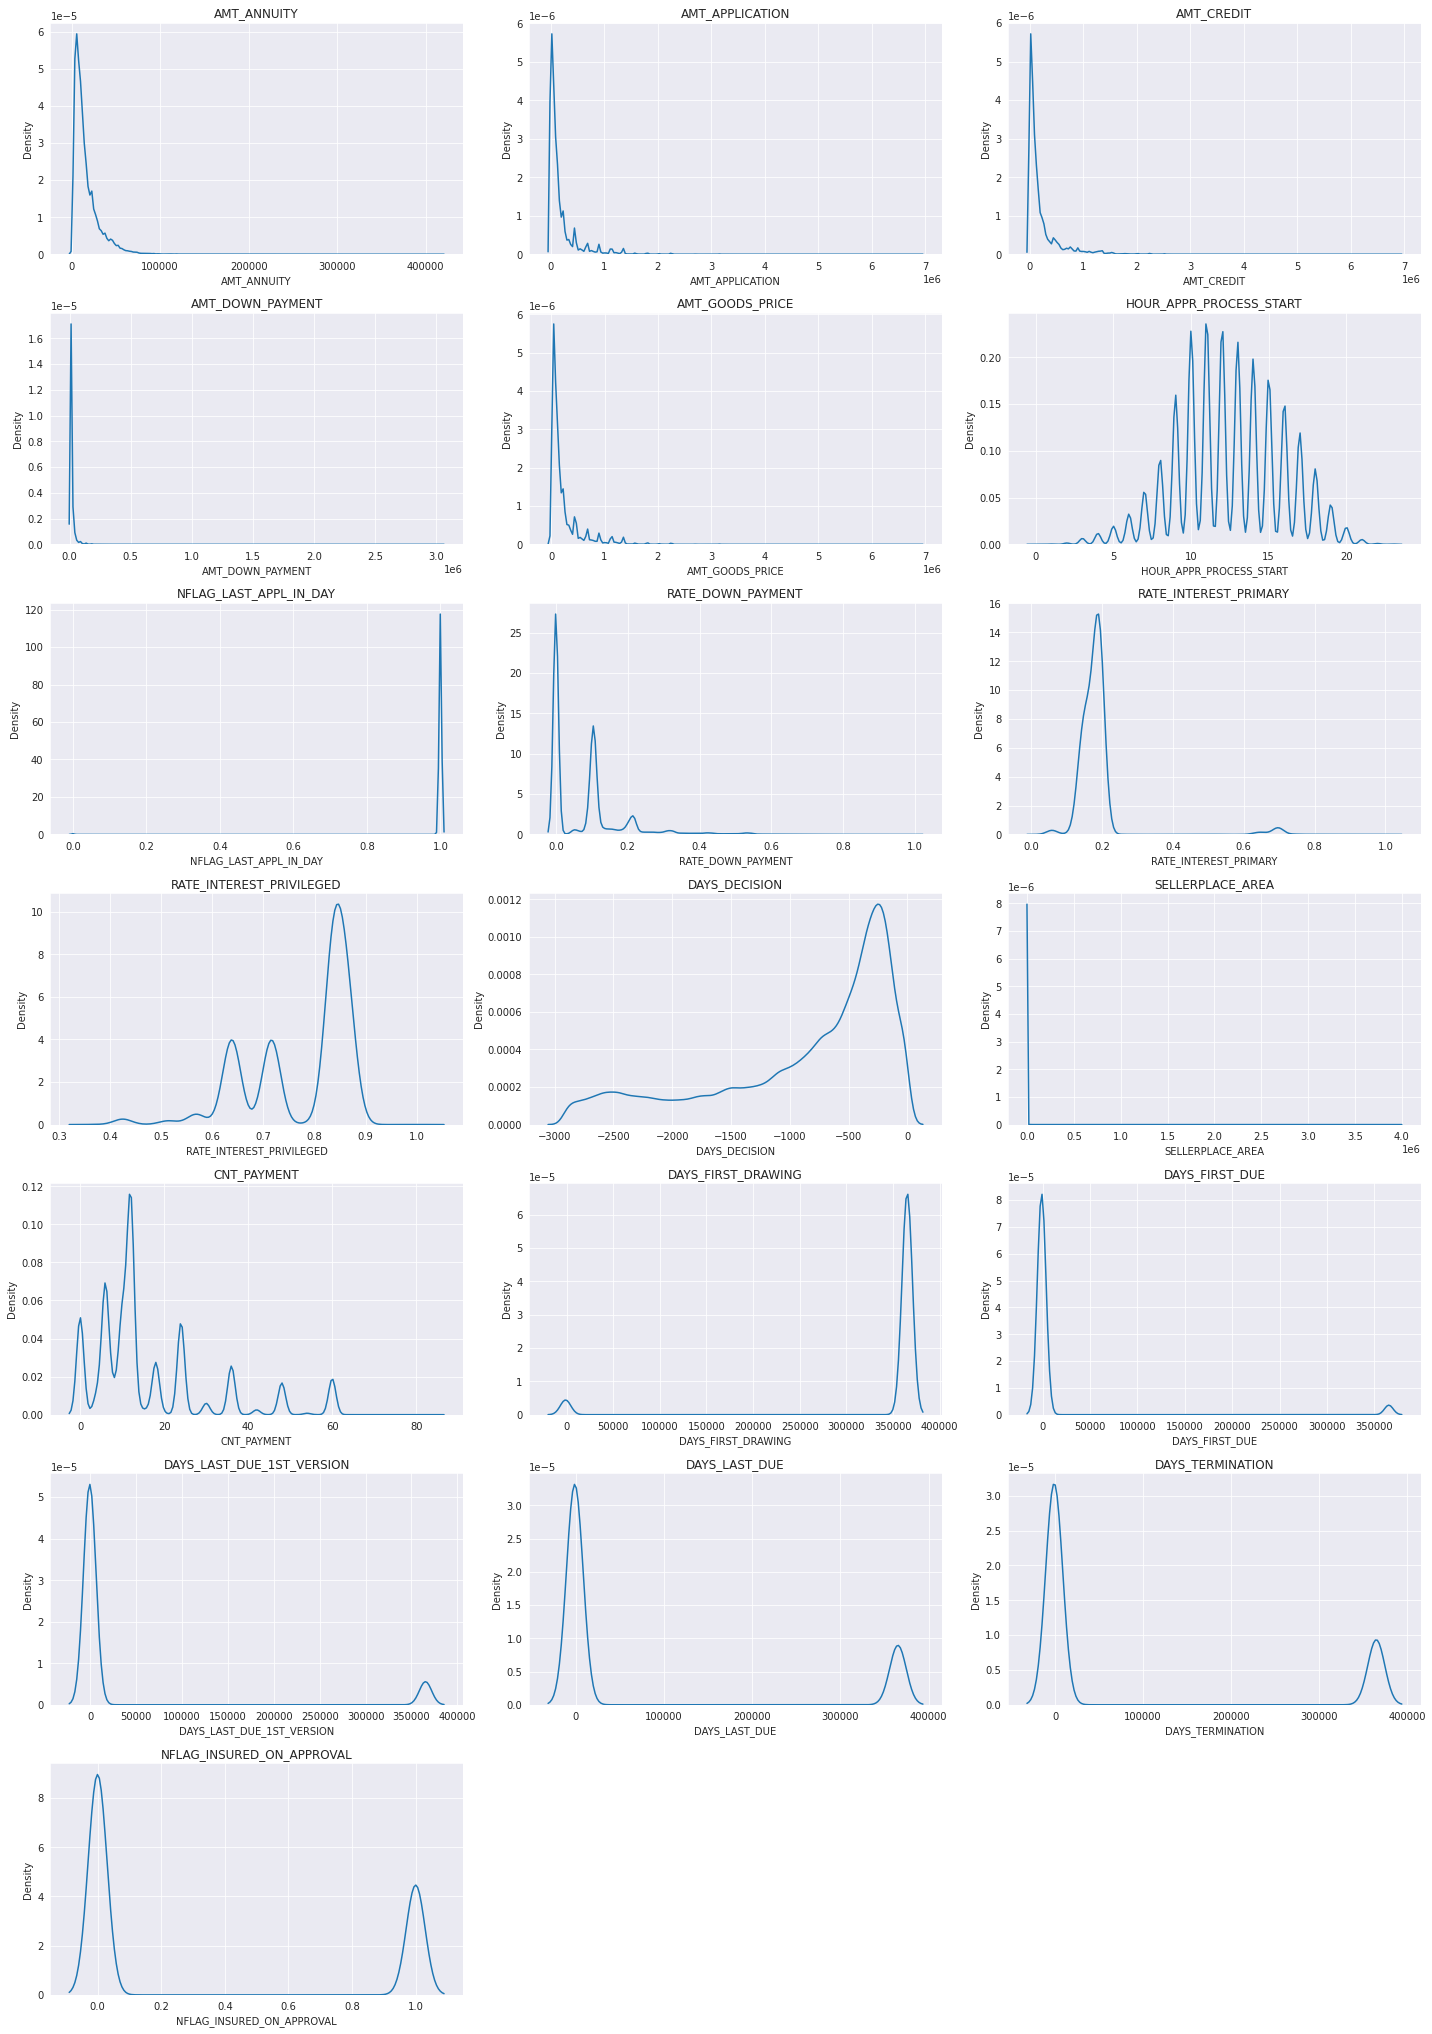

In [ ]:
drawDistributionPlot(previous_application, paNC)

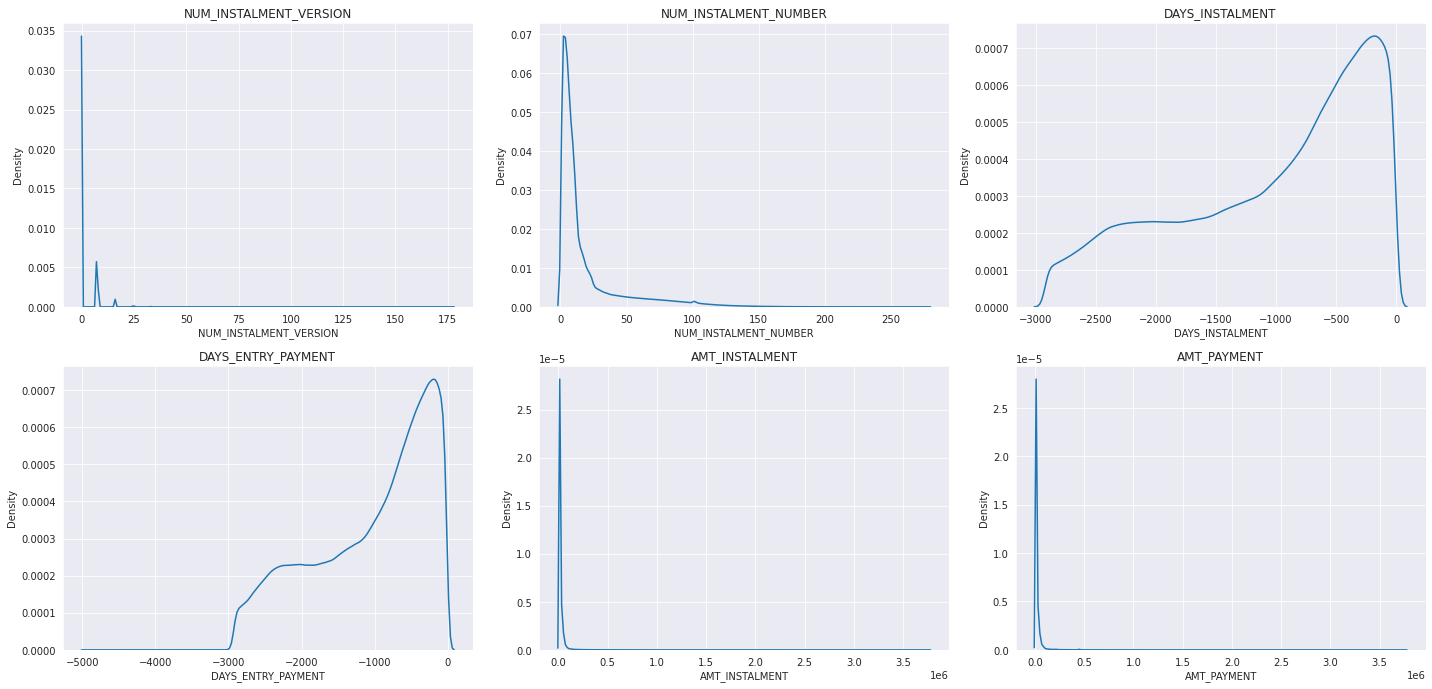

In [ ]:
drawDistributionPlot(installments_payments, ipNC)

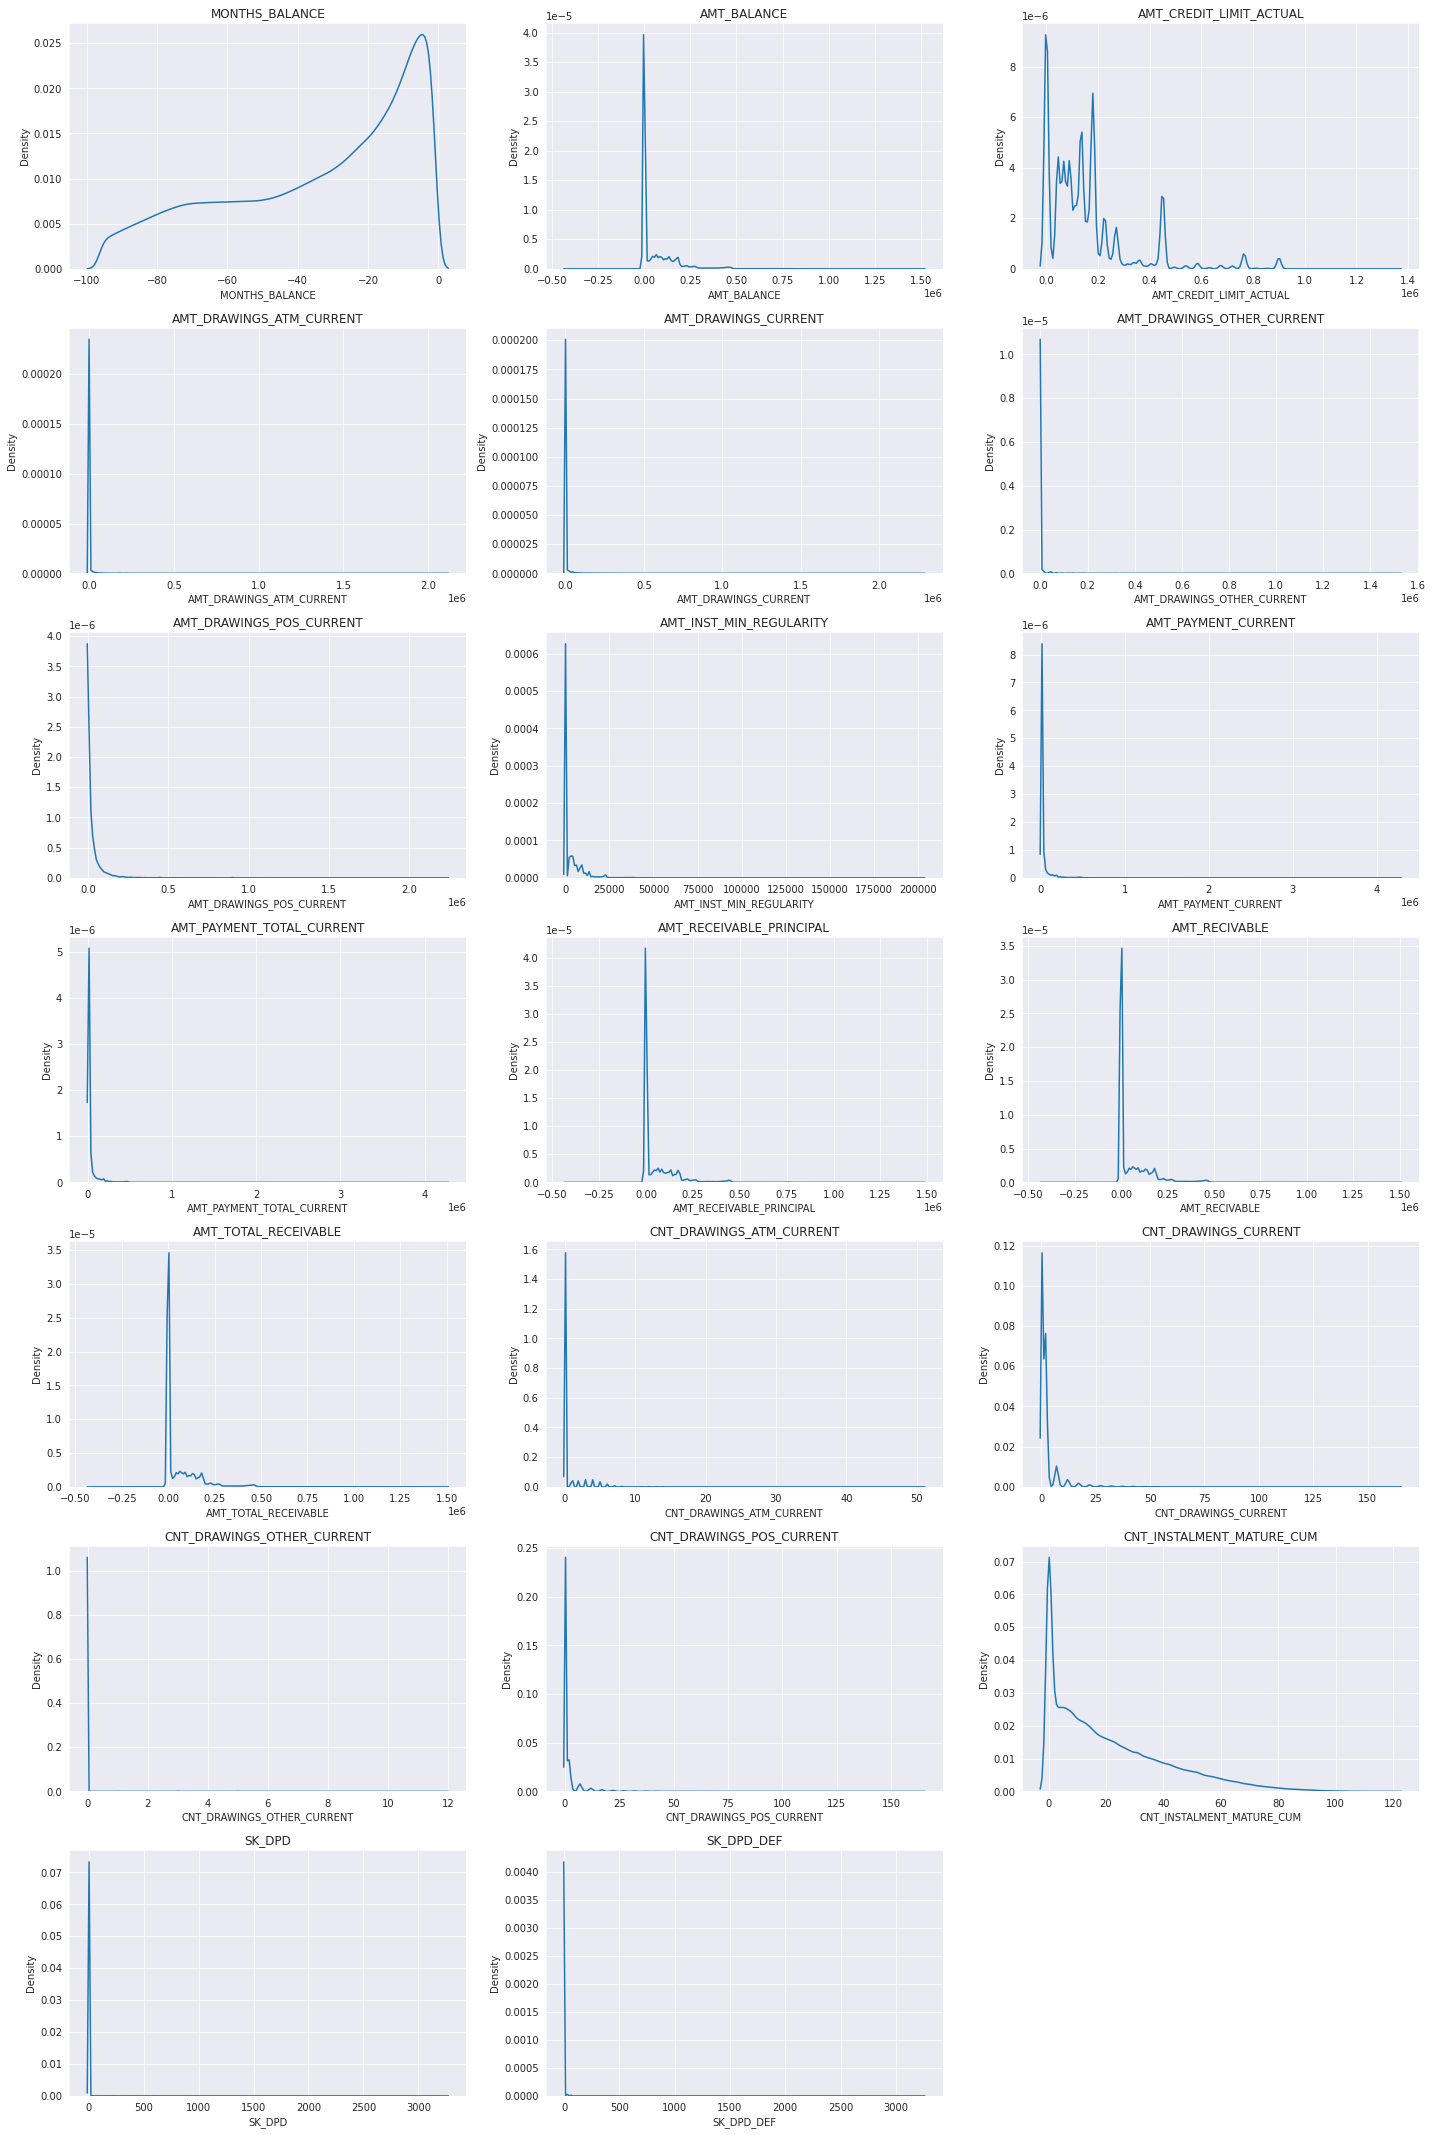

In [ ]:
drawDistributionPlot(credit_card_balance, ccbNC)

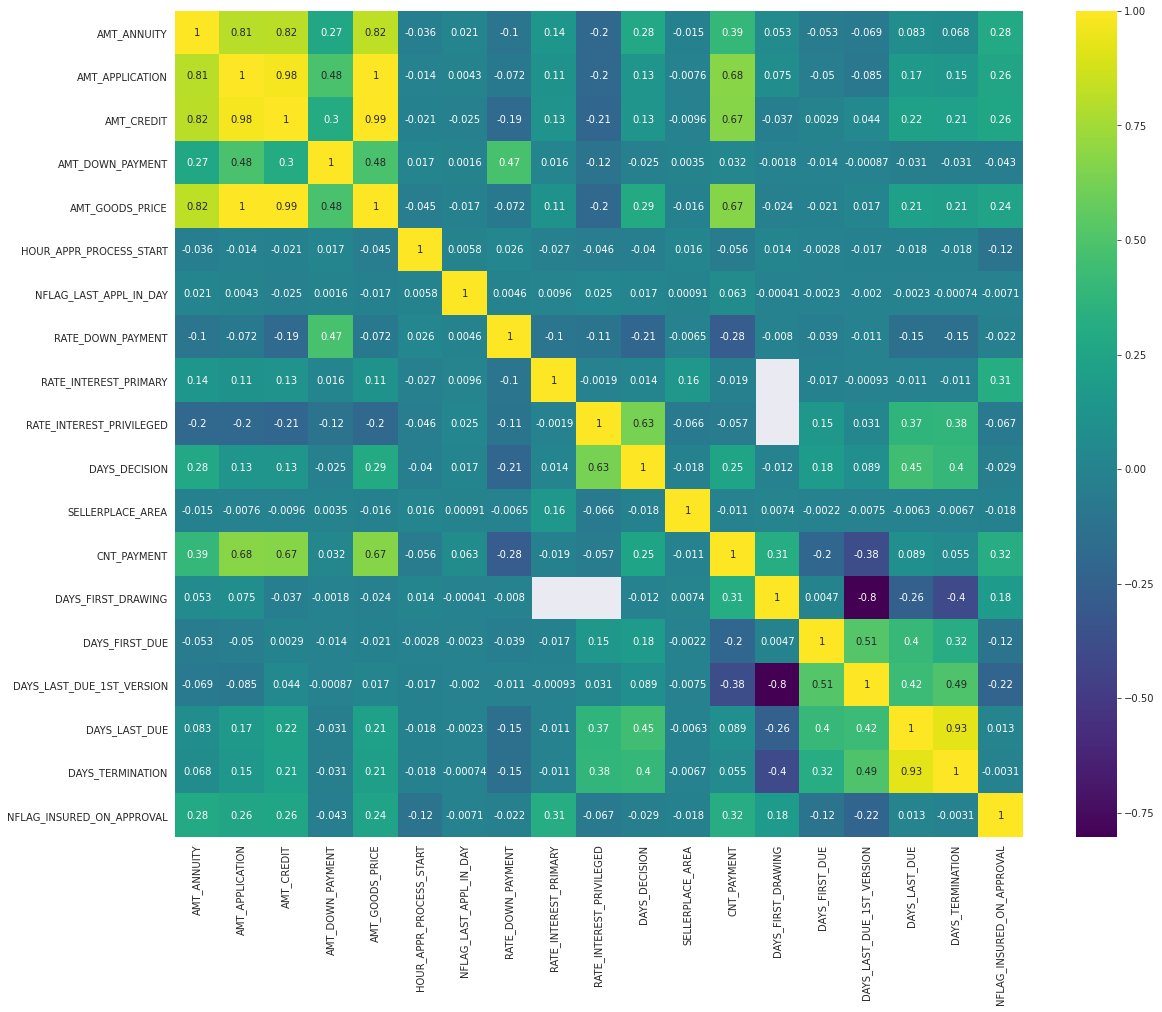

In [ ]:
drawCorrelationMatrix(previous_application)

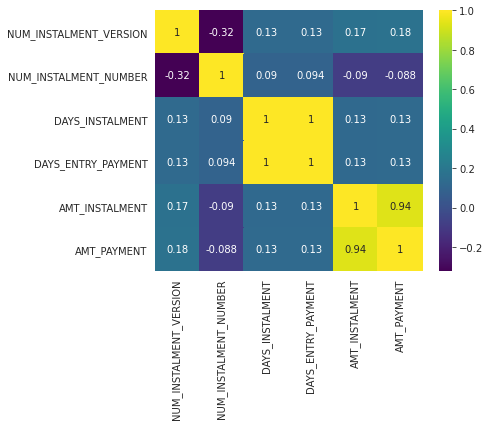

In [ ]:
drawCorrelationMatrix(installments_payments)

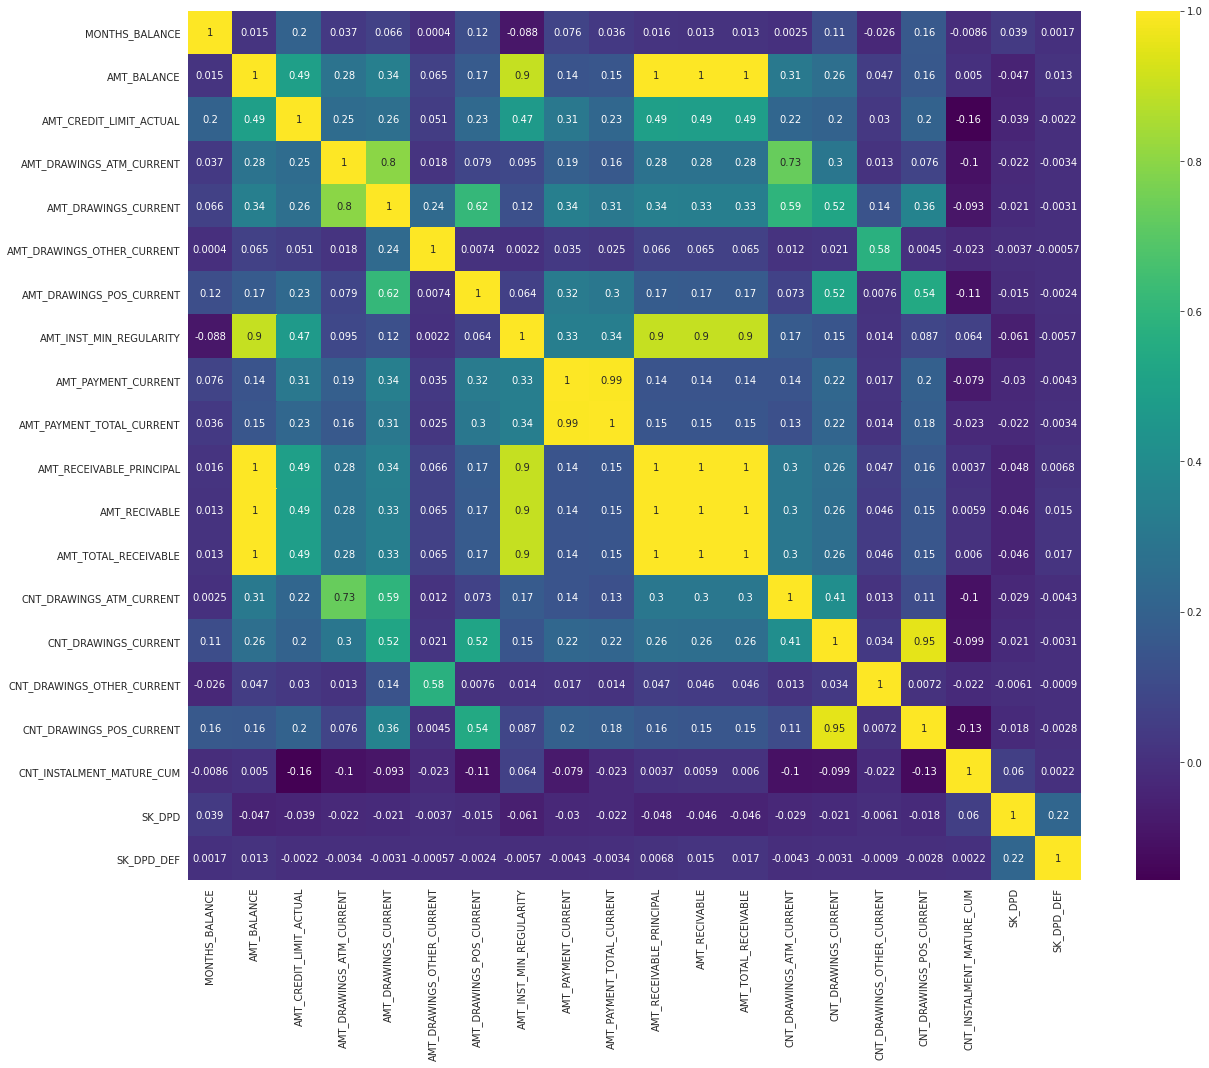

In [ ]:
drawCorrelationMatrix(credit_card_balance)

In [ ]:
getDetailsAboutOnlyMissingValuesColumns(previous_application)

Shape:  (1670214, 32)


Series([], dtype: float64)

In [ ]:
#Drop the data with more than 50% missing values becuase imputing them doesn't makes sense
missingValueColumns = ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE']
previous_application = dropColumns(previous_application, missingValueColumns)

In [ ]:
getDetailsAboutOnlyMissingValuesColumns(installments_payments)

Shape:  (13605401, 8)


Series([], dtype: float64)

In [ ]:
getDetailsAboutOnlyMissingValuesColumns(credit_card_balance)

Shape:  (3840312, 23)


Series([], dtype: float64)

In [ ]:
imputeNumericMissingValuesUsingMean(previous_application)
imputeNumericMissingValuesUsingMean(installments_payments)
imputeNumericMissingValuesUsingMean(credit_card_balance)

imputeCategoricalMissingValuesUsingMode(previous_application)